<a href="https://colab.research.google.com/github/AlanItzep/DL/blob/master/overfitting_unverfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function,unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [0]:
NUM_WORDS = 10000
(train_data, train_labels),(test_data,test_labels)=keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences,dimension):
  results = np.zeros((len(sequences),dimension))
  for i, word_indices in enumerate(sequences):
    results[i,word_indices]=1.0
  return results

train_data = multi_hot_sequences(train_data,dimension=NUM_WORDS)
test_data=multi_hot_sequences(test_data,dimension=NUM_WORDS)


17465344/17464789 [==============================] - 0s 0us/step


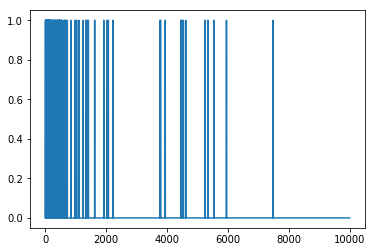

In [0]:
plt.plot(train_data[0])

In [0]:
baseline_model=keras.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

W0718 14:55:43.369322 139670954137472 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0718 14:55:43.507419 139670954137472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
baseline_history=baseline_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data,test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4484 - acc: 0.8160 - binary_crossentropy: 0.4484 - val_loss: 0.3097 - val_acc: 0.8811 - val_binary_crossentropy: 0.3097
Epoch 2/20
25000/25000 - 3s - loss: 0.2292 - acc: 0.9160 - binary_crossentropy: 0.2292 - val_loss: 0.2849 - val_acc: 0.8865 - val_binary_crossentropy: 0.2849
Epoch 3/20
25000/25000 - 3s - loss: 0.1701 - acc: 0.9398 - binary_crossentropy: 0.1701 - val_loss: 0.3000 - val_acc: 0.8808 - val_binary_crossentropy: 0.3000
Epoch 4/20
25000/25000 - 3s - loss: 0.1390 - acc: 0.9532 - binary_crossentropy: 0.1390 - val_loss: 0.3503 - val_acc: 0.8666 - val_binary_crossentropy: 0.3503
Epoch 5/20
25000/25000 - 3s - loss: 0.1155 - acc: 0.9618 - binary_crossentropy: 0.1155 - val_loss: 0.3501 - val_acc: 0.8726 - val_binary_crossentropy: 0.3501
Epoch 6/20
25000/25000 - 3s - loss: 0.0951 - acc: 0.9706 - binary_crossentropy: 0.0951 - val_loss: 0.3802 - val_acc: 0.8688 - val_binary_crossentropy: 0.3802
Ep

In [0]:
smaller_model=keras.Sequential([
    keras.layers.Dense(4,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [0]:
smaller_history=smaller_model.fit(train_data,
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data,test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5300 - acc: 0.7803 - binary_crossentropy: 0.5300 - val_loss: 0.4085 - val_acc: 0.8572 - val_binary_crossentropy: 0.4085
Epoch 2/20
25000/25000 - 3s - loss: 0.3179 - acc: 0.8975 - binary_crossentropy: 0.3179 - val_loss: 0.3216 - val_acc: 0.8826 - val_binary_crossentropy: 0.3216
Epoch 3/20
25000/25000 - 3s - loss: 0.2431 - acc: 0.9204 - binary_crossentropy: 0.2431 - val_loss: 0.2947 - val_acc: 0.8856 - val_binary_crossentropy: 0.2947
Epoch 4/20
25000/25000 - 3s - loss: 0.2023 - acc: 0.9334 - binary_crossentropy: 0.2023 - val_loss: 0.2861 - val_acc: 0.8866 - val_binary_crossentropy: 0.2861
Epoch 5/20
25000/25000 - 3s - loss: 0.1751 - acc: 0.9428 - binary_crossentropy: 0.1751 - val_loss: 0.2867 - val_acc: 0.8859 - val_binary_crossentropy: 0.2867
Epoch 6/20
25000/25000 - 3s - loss: 0.1551 - acc: 0.9504 - binary_crossentropy: 0.1551 - val_loss: 0.2929 - val_acc: 0.8830 - val_binary_crossentropy: 0.2929
Ep

In [0]:
bigger_model=keras.models.Sequential([
    keras.layers.Dense(512,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])
bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [0]:
bigger_history = bigger_model.fit(train_data,train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data,test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 16s - loss: 0.3395 - acc: 0.8581 - binary_crossentropy: 0.3395 - val_loss: 0.2941 - val_acc: 0.8820 - val_binary_crossentropy: 0.2941
Epoch 2/20
25000/25000 - 16s - loss: 0.1415 - acc: 0.9492 - binary_crossentropy: 0.1415 - val_loss: 0.3328 - val_acc: 0.8714 - val_binary_crossentropy: 0.3328
Epoch 3/20
25000/25000 - 16s - loss: 0.0458 - acc: 0.9871 - binary_crossentropy: 0.0458 - val_loss: 0.4735 - val_acc: 0.8674 - val_binary_crossentropy: 0.4735
Epoch 4/20
25000/25000 - 16s - loss: 0.0070 - acc: 0.9987 - binary_crossentropy: 0.0070 - val_loss: 0.5939 - val_acc: 0.8690 - val_binary_crossentropy: 0.5939
Epoch 5/20
25000/25000 - 16s - loss: 0.0011 - acc: 0.9999 - binary_crossentropy: 0.0011 - val_loss: 0.6894 - val_acc: 0.8666 - val_binary_crossentropy: 0.6894
Epoch 6/20
25000/25000 - 16s - loss: 8.4378e-04 - acc: 1.0000 - binary_crossentropy: 8.4378e-04 - val_loss: 0.7158 - val_acc: 0.8694 - val_binary_crossentr

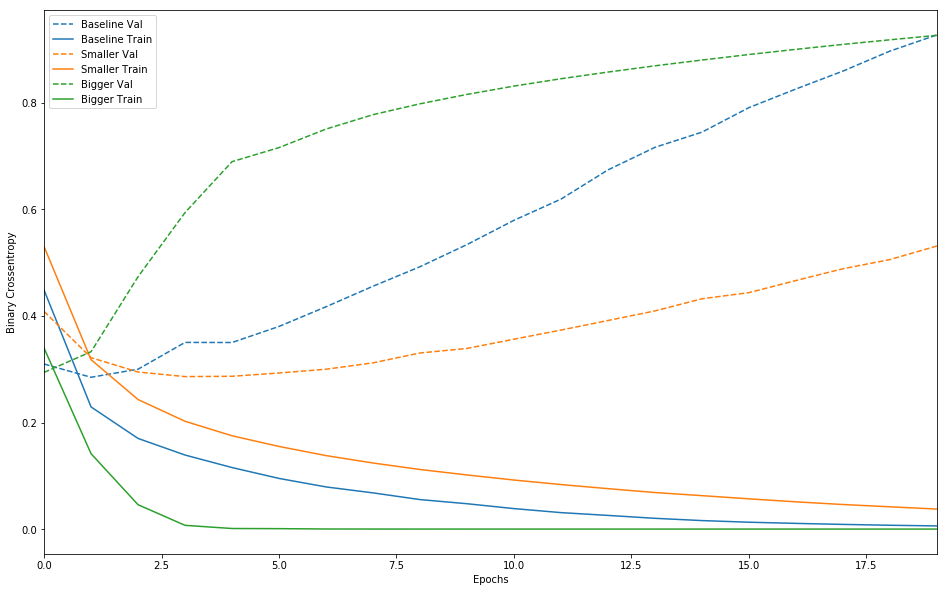

In [0]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
  
  for name, history in histories:
    val=plt.plot(history.epoch,history.history['val_'+key],
                 '--',label=name.title()+' Val')
    plt.plot(history.epoch,history.history[key],color=val[0].get_color(),
            label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
    
    

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


In [0]:
l2_model=keras.models.Sequential([
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy','binary_crossentropy'])
l2_model_history=l2_model.fit(train_data,train_labels,
                             epochs=20,
                             batch_size=512,
                             validation_data=(test_data,test_labels),
                             verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5549 - acc: 0.7757 - binary_crossentropy: 0.5154 - val_loss: 0.4027 - val_acc: 0.8724 - val_binary_crossentropy: 0.3635
Epoch 2/20
25000/25000 - 3s - loss: 0.3160 - acc: 0.9064 - binary_crossentropy: 0.2731 - val_loss: 0.3356 - val_acc: 0.8884 - val_binary_crossentropy: 0.2895
Epoch 3/20
25000/25000 - 3s - loss: 0.2531 - acc: 0.9296 - binary_crossentropy: 0.2043 - val_loss: 0.3345 - val_acc: 0.8874 - val_binary_crossentropy: 0.2838
Epoch 4/20
25000/25000 - 3s - loss: 0.2275 - acc: 0.9402 - binary_crossentropy: 0.1749 - val_loss: 0.3521 - val_acc: 0.8806 - val_binary_crossentropy: 0.2982
Epoch 5/20
25000/25000 - 3s - loss: 0.2094 - acc: 0.9487 - binary_crossentropy: 0.1544 - val_loss: 0.3630 - val_acc: 0.8787 - val_binary_crossentropy: 0.3069
Epoch 6/20
25000/25000 - 3s - loss: 0.1964 - acc: 0.9549 - binary_crossentropy: 0.1393 - val_loss: 0.3747 - val_acc: 0.8769 - val_binary_crossentropy: 0.3171
Ep

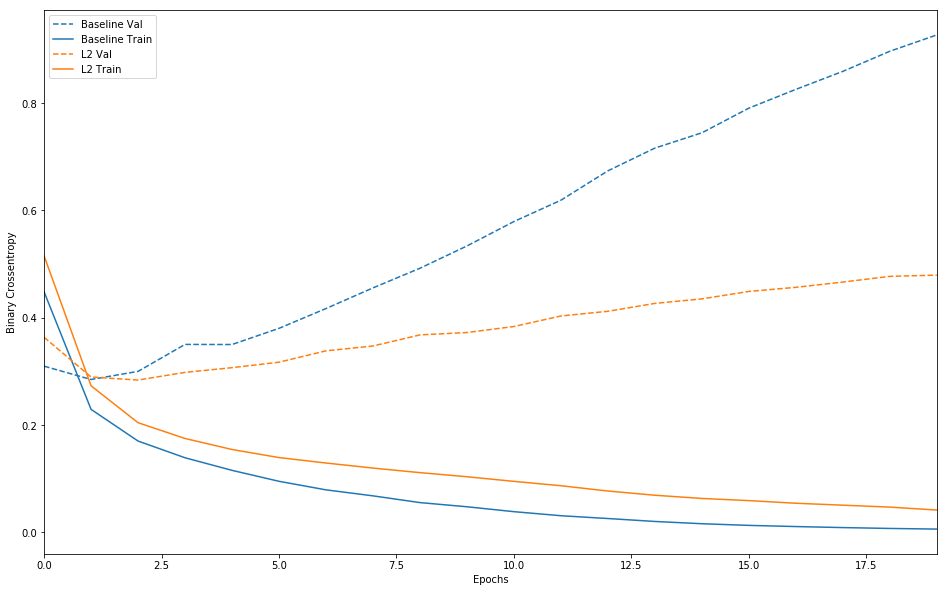

In [0]:
plot_history([('baseline',baseline_history),
              ('l2',l2_model_history)])

In [0]:
dpt_model=keras.models.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])

dpt_model_history=dpt_model.fit(train_data,train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data,test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6179 - acc: 0.6604 - binary_crossentropy: 0.6179 - val_loss: 0.4839 - val_acc: 0.8591 - val_binary_crossentropy: 0.4839
Epoch 2/20
25000/25000 - 3s - loss: 0.4555 - acc: 0.8072 - binary_crossentropy: 0.4555 - val_loss: 0.3329 - val_acc: 0.8832 - val_binary_crossentropy: 0.3329
Epoch 3/20
25000/25000 - 3s - loss: 0.3477 - acc: 0.8708 - binary_crossentropy: 0.3477 - val_loss: 0.2911 - val_acc: 0.8845 - val_binary_crossentropy: 0.2911
Epoch 4/20
25000/25000 - 3s - loss: 0.2885 - acc: 0.8973 - binary_crossentropy: 0.2885 - val_loss: 0.2736 - val_acc: 0.8884 - val_binary_crossentropy: 0.2736
Epoch 5/20
25000/25000 - 3s - loss: 0.2449 - acc: 0.9154 - binary_crossentropy: 0.2449 - val_loss: 0.2761 - val_acc: 0.8879 - val_binary_crossentropy: 0.2761
Epoch 6/20
25000/25000 - 3s - loss: 0.2169 - acc: 0.9248 - binary_crossentropy: 0.2169 - val_loss: 0.2838 - val_acc: 0.8843 - val_binary_crossentropy: 0.2838
Ep

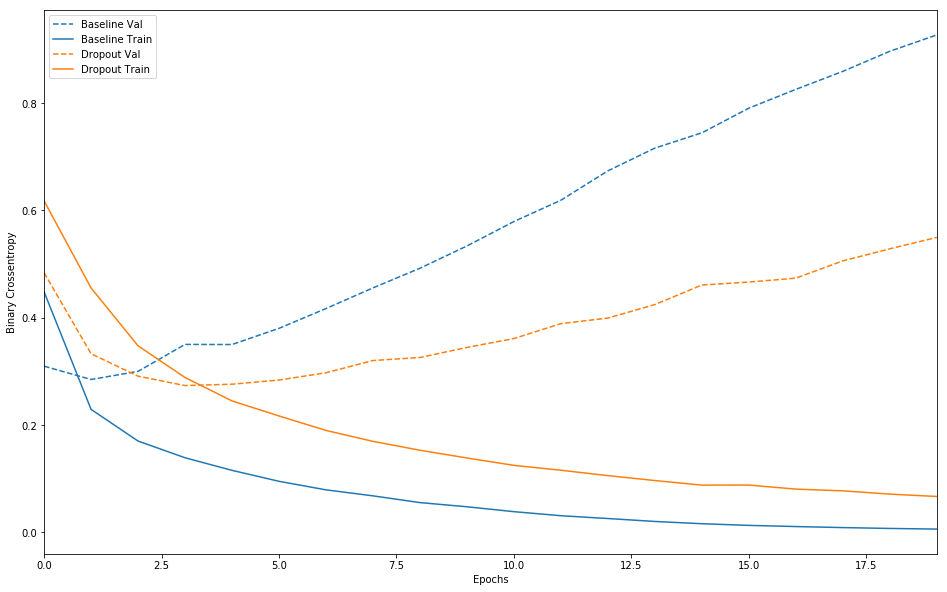

In [0]:
plot_history([('baseline',baseline_history),
             ('dropout',dpt_model_history)])